In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import ot
from REW_utils import *
import matplotlib.pyplot as plt
from IPython.display import SVG

[pyKeOps] Compiling nvrtc binder for python ... 
[KeOps] Warning : There were warnings or errors :
In file included from /homes/numerik/piening/.local/lib/python3.11/site-packages/pybind11/include/pybind11/detail/../attr.h:13:0,
                 from /homes/numerik/piening/.local/lib/python3.11/site-packages/pybind11/include/pybind11/detail/class.h:12,
                 from /homes/numerik/piening/.local/lib/python3.11/site-packages/pybind11/include/pybind11/pybind11.h:13,
                 from /store/frege/datastore/piening/.local/lib/python3.11/site-packages/pykeops/common/keops_io/pykeops_nvrtc.cpp:9:
/homes/numerik/piening/.local/lib/python3.11/site-packages/pybind11/include/pybind11/detail/../detail/common.h:266:10: fatal error: Python.h: No such file or directory
 #include <Python.h>
          ^~~~~~~~~~
compilation terminated.

OK


## Input Spaces

In [2]:
pvX1 = pv.Sphere(start_phi = 0,end_phi=90,start_theta= 0,end_theta=90)
pvX2 = pv.Sphere(start_phi = 120,end_phi=165,start_theta= 0)

In [ ]:
%%capture

pl = pv.Plotter(window_size=(300,300))
pl.add_mesh(pvX1)
pl.save_graphic("img/Sphere1_org.svg")

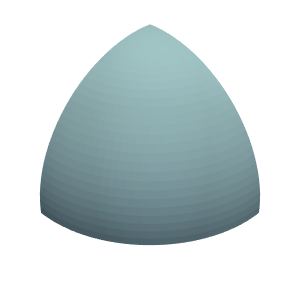

In [9]:
SVG("img_sphere/Sphere1_org.svg")

In [ ]:
pl = pv.Plotter(window_size=(300,300))
pl.add_mesh(pvX2)
pl.save_graphic("img/Sphere2_org.svg")

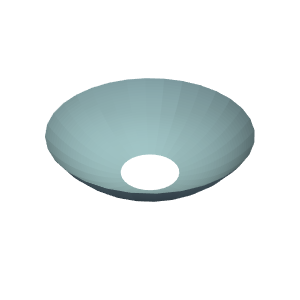

In [13]:
SVG("img_sphere/Sphere2_org.svg")

## Preprocessing

In [5]:
#convert to mm-spaces (metric spaces with measures)

X1 = GM(X=np.array(pvX1.points,dtype="d"),Tris=pvX1.faces.reshape((-1, 4))[:,1:],
        mode="surface",gauge_mode="djikstra",xi="surface_uniform",normalize_gauge=True,squared=False)

X2 = GM(X=np.array(pvX2.points,dtype="d"),Tris=pvX2.faces.reshape((-1, 4))[:,1:],
        mode="surface",gauge_mode="djikstra",xi="surface_uniform",normalize_gauge=True,squared=False)


## Run Joint Embedding

In [6]:
Z_name = "Sphere"
n = 30
max_len = 1.3 # Set Reference Space to spherical 30 x 30 grid with maximum distance equal to 1.3
m, ZZ, Z, gamma_X1Y1,gamma_Y2X2,zeta1,zeta2 = Wrapper_REW(X1, X2, n=n, n_its=50, eps=1e-3, 
                                                         lambda_GW=1e3, thres=0.,
                                                         Z_name =Z_name, max_len=max_len)

---Parameter Setting---
eps:  0.001 lambda:  1000.0 Domain  Sphere


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:45<00:00,  1.09it/s]


## Save Embeddings

In [7]:
pl = pv.Plotter(window_size=(300,300))
pl.add_mesh(m,scalars=zeta1 / ZZ.xi)
pl.camera_position = 'yz'
pl.remove_scalar_bar()
pl.save_graphic("img_sphere/Sphere1_em.svg")

pl = pv.Plotter(window_size=(300,300))
pl.add_mesh(m,scalars=zeta2 / ZZ.xi)
pl.camera_position = 'yz'
pl.remove_scalar_bar()
pl.save_graphic("img_sphere/Sphere2_em.svg")

# See directories bc Juypter was unable to display output